# 画像メディア工学１２回目
## 12. 射影変換の応用（射影変換による画像合成）
画像中の看板などに別の画像を合成する場合には，射影変換が利用できる．

以下では，画像３枚(img08src.jpg,img08dst.jpg,img09.jpg)をダウンロードして利用してください．

### ライブラリの読み込み

In [1]:
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import cv2

### 射影変換計算のための関数の定義
8.4.3節の(8.36)式までの計算．

In [2]:
def calcHomography(srcP,dstP):
    if srcP.shape != dstP.shape:
        print('number of points do not match')
        exit()
            
    Pnum = srcP.shape[0]
    A = np.zeros((2*Pnum,8))
    B = np.zeros((2*Pnum,1))
    H = np.zeros((3,3))
    
    for i in range(Pnum):        
        A[2*i]   = [srcP[i][0],srcP[i][1],1,0,0,0,
                    -srcP[i][0]*dstP[i][0],-srcP[i][1]*dstP[i][0]]
        A[2*i+1] = [0,0,0,srcP[i][0],srcP[i][1],1,
                    -srcP[i][0]*dstP[i][1],-srcP[i][1]*dstP[i][1]]
        B[2*i]   = [dstP[i][0]]
        B[2*i+1] = [dstP[i][1]]
    
    h = np.dot( np.linalg.inv(A), B )
    H = np.array([[h[0][0],h[1][0],h[2][0]],
                  [h[3][0],h[4][0],h[5][0]],
                  [h[6][0],h[7][0],1.0]])

    return H

### 画像の読み込み

In [3]:
dstI = cv2.imread('img08dst.jpg')
srcI = cv2.imread('img08src.jpg')
srcI = cv2.cvtColor(srcI, cv2.COLOR_BGR2RGB) # カラー画像はRGBの順を入れ替え

合成したい画像

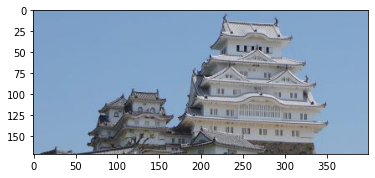

In [4]:
plt.imshow(srcI);

看板画像（合成先の画像）

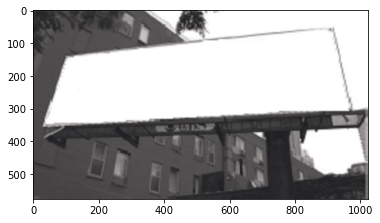

In [5]:
plt.imshow(dstI);

### 射影変換を計算するための対応点の指定

射影変換の計算に必要な最小の点数４点を指定（以下では，左上，左下，右下，右上の順)．

In [6]:
# 合成したい画像の4点
# ここでは画像全体で，左上は(0,0), 右下は(m,n)　m=画像の高さ,n=画像の幅
m,n = srcI.shape[:2]
srcP = np.array([[0,0],
                 [0,m],
                 [n,m],
                 [n,0]], dtype=np.float32)

# 合成先の座標4点
# 上の描画結果から4点の座標を読み取るなどして指定する
dstP = np.array([[100, 143],
                 [ 30, 353],
                 [980, 302],
                 [922,  50]], dtype=np.float32)

### 射影変換行列の計算
上で実装した関数を利用して計算できる．

ただし，実際にはOpenCVの関数(```cv2.getPerspectiveTransform()```)を利用したほうがよい．

（今回の例では，どちらを利用しても同じ結果となる）

In [7]:
H = calcHomography(srcP, dstP)
print(H)

#H = cv2.getPerspectiveTransform(srcP, dstP)
#print(H)

[[ 1.61343612e+00 -4.28437405e-01  1.00000000e+02]
 [-2.56445981e-01  9.68409792e-01  1.43000000e+02]
 [-4.78919615e-04 -7.15355355e-04  1.00000000e+00]]


### 射影変換による画像の変換
ここでは，```cv2.warpPerspective()```関数を利用する．

引数：変換前画像，射影変換行列，変換後画像のサイズ

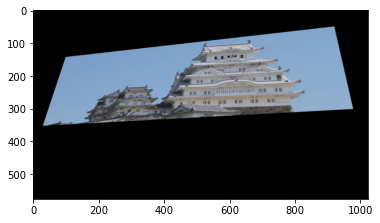

In [8]:
conv = cv2.warpPerspective(srcI, H, (dstI.shape[1],dstI.shape[0]))
plt.imshow(conv);

### 画像の合成
合成先画像```(dstI)```に，変換後の画像を合成する．

ここでは，```conv```の画素値が```0```ではない領域のみを```dstI```にコピーすることで合成を実現している．

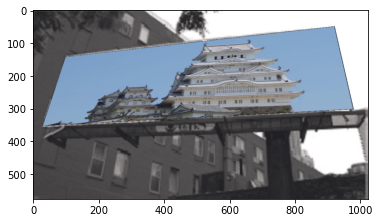

In [9]:
dstI[conv!=0]=conv[conv!=0]
plt.imshow(dstI);

### 課題
上の例とは逆で，傾いて撮影された画像を正面向き画像に変換するプログラムを完成させてください．

具体的には，```srcP2```の値を適切に指定し，その内容を提出してください．

変換前画像の表示：

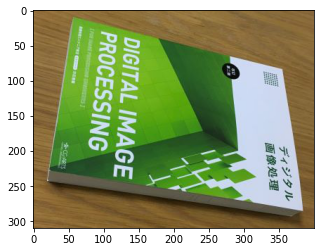

In [10]:
srcI2 = cv2.imread('img09.jpg')
srcI2 = cv2.cvtColor(srcI2, cv2.COLOR_BGR2RGB) # カラー画像はRGBの順を入れ替え
plt.imshow(srcI2);

射影変換のための対応点の指定：

上の描画表示から，変換したい画像の範囲の座標４点を読み取り，```srcP2```に代入してください．

```dstP2```の座標は，変換後画像が縦長になるように指定済みですので，それと対応が取れるように```srcP2```の座標もしてください．

In [11]:
# 合成したい画像範囲の４点
# 以下では画像全体が指定されている
m,n = srcI2.shape[:2]
srcP2 = np.array([[0,0],
                  [0,m],
                  [n,m],
                  [n,0]], dtype=np.float32)

# 合成先の座標4点
# 以下では300x400の縦長画像となるよう指定されている
dstP2 = np.array([[  0,   0],
                  [  0, 400],
                  [300, 400],
                  [300,   0]], dtype=np.float32)

射影変換の計算と画像の変換

[[0.75       0.         0.        ]
 [0.         1.29032258 0.        ]
 [0.         0.         1.        ]]


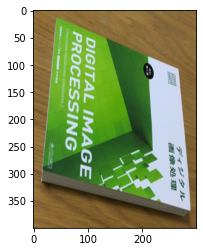

In [12]:
H = cv2.getPerspectiveTransform(srcP2, dstP2)
print(H)

conv = cv2.warpPerspective(srcI2, H, (300, 400))
plt.imshow(conv);